In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [3]:
churn= pd.read_csv(r"C:\Users\NIKITHA PAGADALA\Downloads\Churn_Modelling.csv", header=0)

# Copy to back-up file
churn_bk = churn.copy()

# Display the first 5 records

churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
churn=churn.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
churn['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [7]:
churn['Gender']=churn['Gender'].str.replace('Male','0')
churn['Gender']=churn['Gender'].str.replace('Female','1')
churn['Gender']=churn['Gender'].astype(int)

In [8]:
churn['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
churn['Geography']=churn['Geography'].str.replace('France','0')
churn['Geography']=churn['Geography'].str.replace('Germany','1')
churn['Geography']=churn['Geography'].str.replace('Spain','2')
churn['Geography']=churn['Geography'].astype(int)

#churn['Geography']=churn['Geography'].map({'Spain':0,'Germany':1,'France':1})

In [10]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [11]:
Exited_count=churn.Exited.value_counts()
print('class 0:',Exited_count[0])
print('class 1:',Exited_count[1])
print('proportion:',round(Exited_count[0]/Exited_count[1],2),':1')
print("total churn modelling records",len(churn))

class 0: 7963
class 1: 2037
proportion: 3.91 :1
total churn modelling records 10000


In [12]:
churn.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df_dup=churn[churn.duplicated(keep='last')]
df_dup

#to convert geography n gender to numerical format
# churn=pd.get_dummies(churn,columns=['Geography','Gender'])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


to convert geography n gender to numerical format
churn=pd.get_dummies(churn,columns=['Geography','Gender'])

techiniques to convert 
1. map
2. replace
3. get_dummies
4. one hot encoder
5. label encoder

In [14]:
TargetVar='Exited'
independent_var=[]
for col in churn.columns:
    if col!=TargetVar:
        independent_var.append(col)

x=churn[independent_var]
y=churn[TargetVar]
print(x.columns)
print(y)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [16]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train[independent_var]=mmscaler.fit_transform(x_train[independent_var])
x_train = pd.DataFrame(x_train)

x_test[independent_var] = mmscaler.fit_transform(x_test[independent_var])
x_test = pd.DataFrame(x_test)

In [17]:
from sklearn.tree import DecisionTreeClassifier
ModelDt=DecisionTreeClassifier()
ModelDt.fit(x_train,y_train)
y_pred=ModelDt.predict(x_test)
y_pred_prob=ModelDt.predict_proba(x_test)

In [18]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Confusion matrix : 
 [[ 340  278]
 [ 362 2020]]
Outcome values : 
 340 278 362 2020
Classification report : 
               precision    recall  f1-score   support

           1       0.48      0.55      0.52       618
           0       0.88      0.85      0.86      2382

    accuracy                           0.79      3000
   macro avg       0.68      0.70      0.69      3000
weighted avg       0.80      0.79      0.79      3000

Accuracy : 78.7 %
Precision : 48.4 %
Recall : 55.0 %
F1 Score : 0.515
Specificity or True Negative Rate : 84.8 %
Balanced Accuracy : 69.9 %
MCC : 0.38
roc_auc_score: 0.699


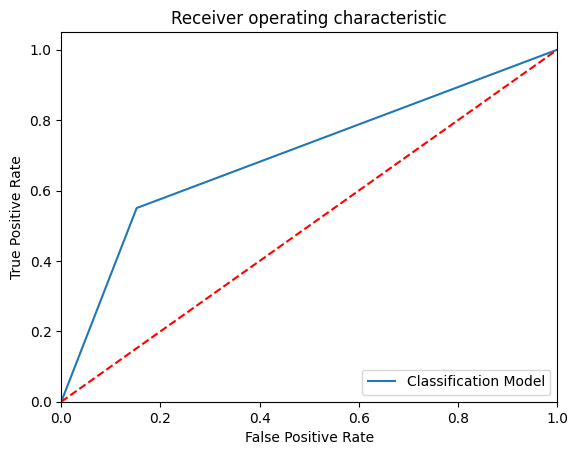

In [20]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


actual = y_test

predicted = y_pred


matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)


tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)


sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);


from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)


from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDt.predict_proba(x_test)[:,1])
plt.figure()

plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

In [21]:

Results = pd.DataFrame({'_P':y_pred})
ResultsFinal = churn_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,_P
235,236,15772896,Dumetochukwu,763,Germany,Male,42,6,100160.75,1,1,0,33462.94,1,0
1230,1231,15742480,Igwebuike,775,Germany,Male,36,2,109949.05,2,0,1,71682.54,0,0
46,47,15602280,Martin,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1,1
2193,2194,15764409,Goodman,613,France,Male,37,9,108286.50,1,1,1,114153.44,0,0
862,863,15794916,Pirogov,725,France,Male,41,7,113980.21,1,1,1,116704.25,0,0
468,469,15633283,Padovano,536,France,Male,35,8,0.00,2,1,0,64833.28,0,1
2399,2400,15672516,Wall,541,Germany,Male,51,7,90373.28,2,1,0,179861.79,0,0
2015,2016,15715297,Yuan,779,Germany,Female,40,2,75470.23,1,1,1,52894.01,0,0
1477,1478,15732175,Bruno,776,France,Male,37,2,0.00,1,0,1,8065.00,0,1
657,658,15698474,Sagese,601,Germany,Female,54,1,131039.97,2,1,1,199661.50,0,0


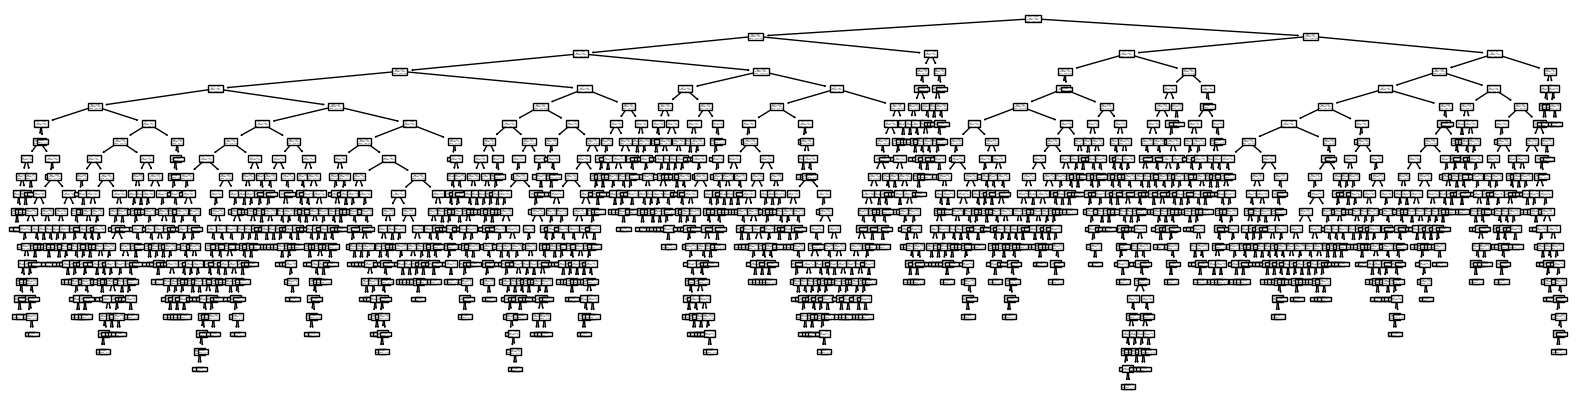

In [22]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,5))
tree.plot_tree(ModelDt);
